In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from pathlib import Path

In [2]:
ROOT_DIR = os.path.dirname(
os.path.dirname(str(Path(os.path.abspath('')).absolute())))

# Load Model

In [3]:
TARGET_NAME = "delta_E/"
ENCODING_NAME = "atomic/"
MODEL_NAME = "random_forest_model.pkl"

In [4]:
MODELS_DIR = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "models", TARGET_NAME, ENCODING_NAME
)

In [5]:
with open(MODELS_DIR + MODEL_NAME, 'rb') as file:
    model = pickle.load(file)

# Load Data Sets

In [6]:
X_TRAIN_NAME = "X_train.csv"
y_TRAIN_NAME = "y_train.csv"

In [7]:
X_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", X_TRAIN_NAME), index_col=0)
y_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", y_TRAIN_NAME), index_col=0)

In [8]:
X_TEST_NAME = "X_Structure gen..csv"
y_TEST_NAME = "y_Structure gen..csv"

In [9]:
X_test = pd.read_csv(MODELS_DIR + "/datasets/" + X_TEST_NAME, index_col=0)
y_test = pd.read_csv(MODELS_DIR + "/datasets/" + y_TEST_NAME, index_col=0)

In [10]:
X_test.describe()

,ecutrho,k_density,ecutwfc,Ag,Al,Ar,As,Au,B,Ba,...,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr,total_atoms
count,53926.000000,53926.000000,53926.000000,53926.000000,53926.000000,53926.0,53926.000000,53926.000000,53926.0,53926.0,...,53926.000000,53926.000000,53926.000000,53926.000000,53926.0,53926.000000,53926.000000,53926.000000,53926.000000,53926.000000
mean,244.199829,5.921559,56.750732,0.008104,0.014195,0.0,0.001382,0.010162,0.0,0.0,...,0.015772,0.009940,0.030060,0.005962,0.0,0.011692,0.010820,0.019786,0.020547,2.024144
std,89.386973,2.819707,23.755013,0.063137,0.083044,0.0,0.026246,0.070554,0.0,0.0,...,0.087391,0.069793,0.118855,0.054272,0.0,0.075560,0.072754,0.097477,0.099254,0.218418
min,100.000000,2.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
25%,180.000000,4.000000,35.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
50%,260.000000,6.000000,55.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
75%,340.000000,8.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
max,380.000000,10.000000,100.000000,0.500000,0.500000,0.0,0.500000,0.500000,0.0,0.0,...,0.500000,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,4.000000


In [11]:
pred_trees = np.array([estimator.predict(X_train) for estimator in model.estimators_]).T

In [14]:
y_pred = model.predict(X_train)

In [15]:
np.allclose(np.mean(pred_trees, axis=1), y_pred)

True

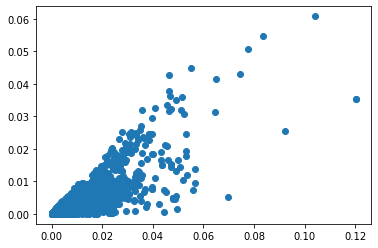

In [16]:
x = np.std(pred_trees, axis=1)
y = np.abs(y_pred - y_train.values.squeeze())
plt.scatter(x, y)